In [1]:
from figures.utils import (
    plot_combined_heads,
    plot_kl_divergence_simple,
    plot_val_loss_simple,
    fetch_run_data
)

/Users/rodrigoalvarezlucendo/Desktop/ar-classification/.venv/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/Users/rodrigoalvarezlucendo/Desktop/ar-classification/.venv/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` m

In [2]:
run_id = "seo4z7uz"
data = fetch_run_data(run_id, metrics=["val_loss"])
cfg = data["config"]

In [3]:
student_cfg = cfg["student"]
student_cfg
full_dissect_keys = [
    "dropout",
    "use_key_projection",
    "layer_normalization",
    "use_mlp",
    "teacher_readout",
    "use_output_projection",
    "skip_connection",
    "attention_disentanglement",
    "pe_type",
]

for key in full_dissect_keys:
    print(f"{key}: {student_cfg[key]}")

dropout: 0.1
use_key_projection: True
layer_normalization: True
use_mlp: True
teacher_readout: False
use_output_projection: True
skip_connection: True
attention_disentanglement: False
pe_type: absolute


In [4]:
attention_steps = [0, 70, 375, 1500]
divergence_steps = [2090, 2410]
max_steps = 3000
save_attention = None  # Set to string to save attention plots, None to display
figsize = (12, 8)

wandb:   1 of 1 files downloaded.  


Saved to cache: c28c4df2e8445cc72405ed67286cdfdc.pkl


wandb:   1 of 1 files downloaded.  


Saved to cache: 147f2b7211ebe0bb39f68b6307d2f7fa.pkl


wandb:   1 of 1 files downloaded.  


Saved to cache: 665bf94855462192ceb6b420ccbee135.pkl


wandb:   1 of 1 files downloaded.  


Saved to cache: 934a3dbfba1070c04ec022261f6cc1ba.pkl
Saved figure to figures/reverse-constants/results/attention-reversed.pdf


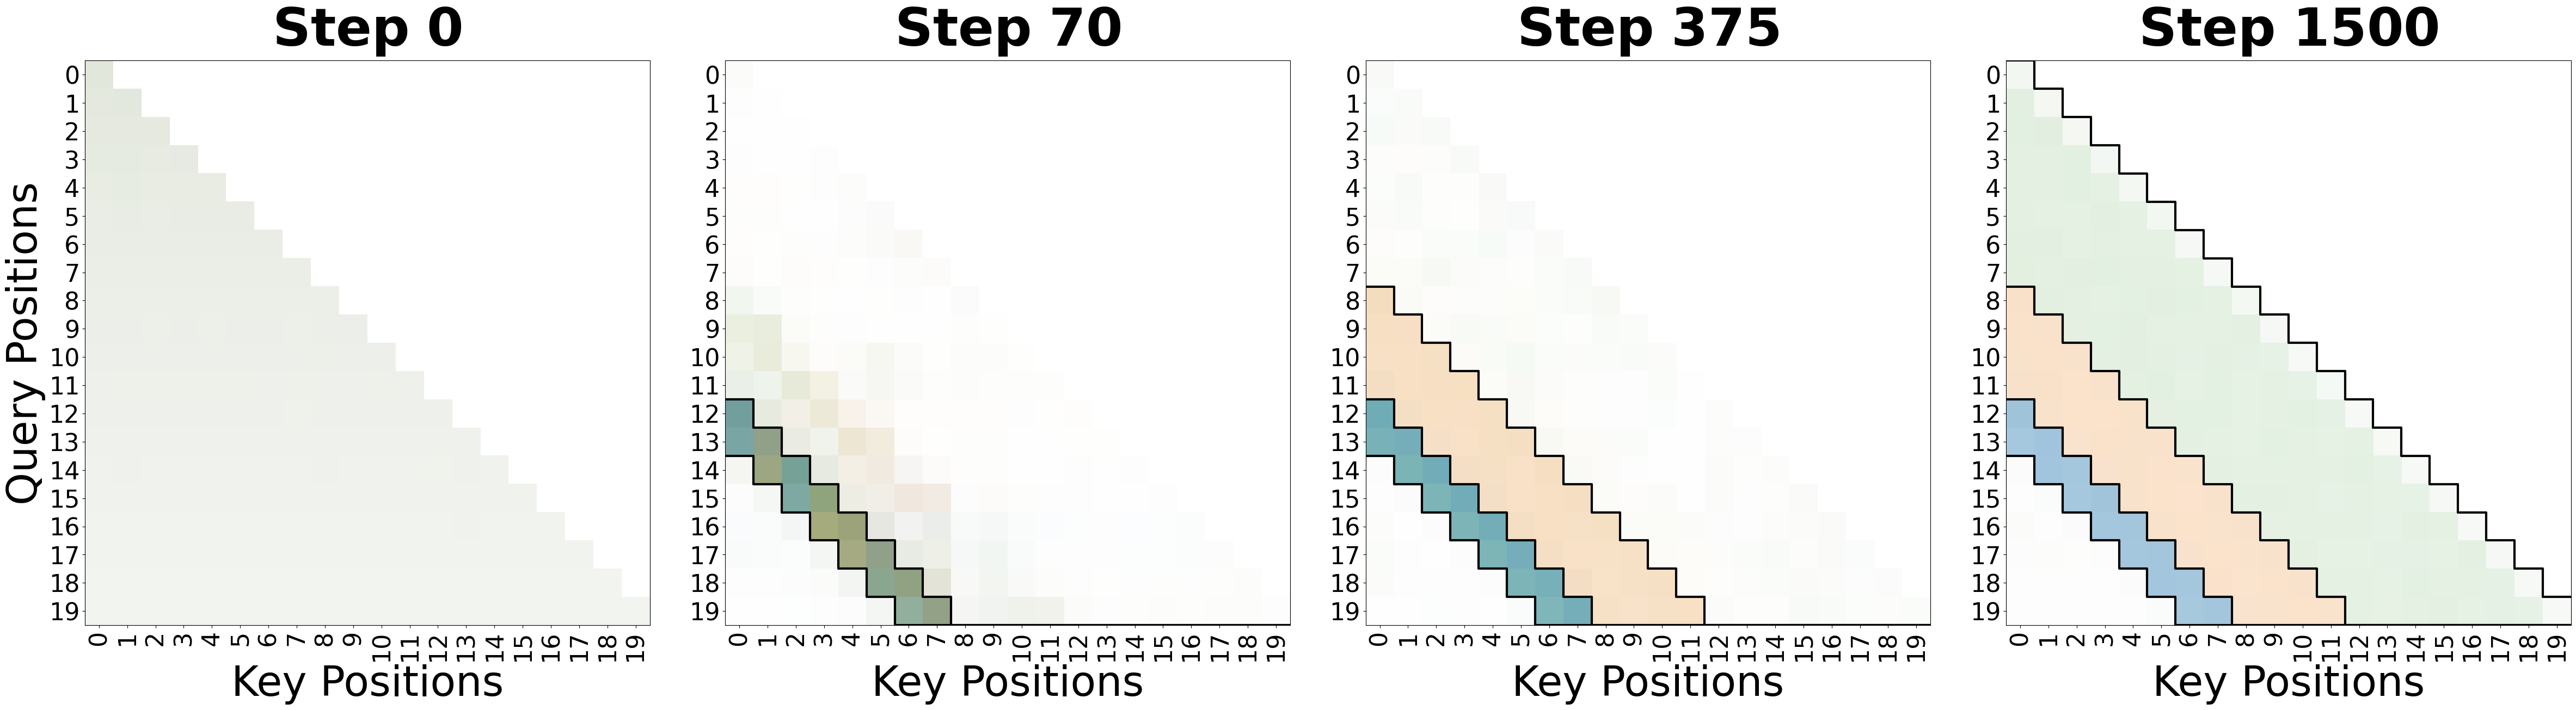

In [ ]:
plot_combined_heads(
    f"run-{run_id}-val_attention_weights",
    steps=attention_steps,
    split="val",
    save_name="figures/reverse-constants/results/attention-reversed",
    head_colors={0: "#2ca02c", 1: "#ff7f0e", 2: "#1f77b4"},
    diagonal_offsets={1: [-12, -14], 2: [-12, -14, -8], 3: [-12, -14, -8, 0]},
)

Saved figure to figures/reverse-constants/results/kl-reversed.pdf


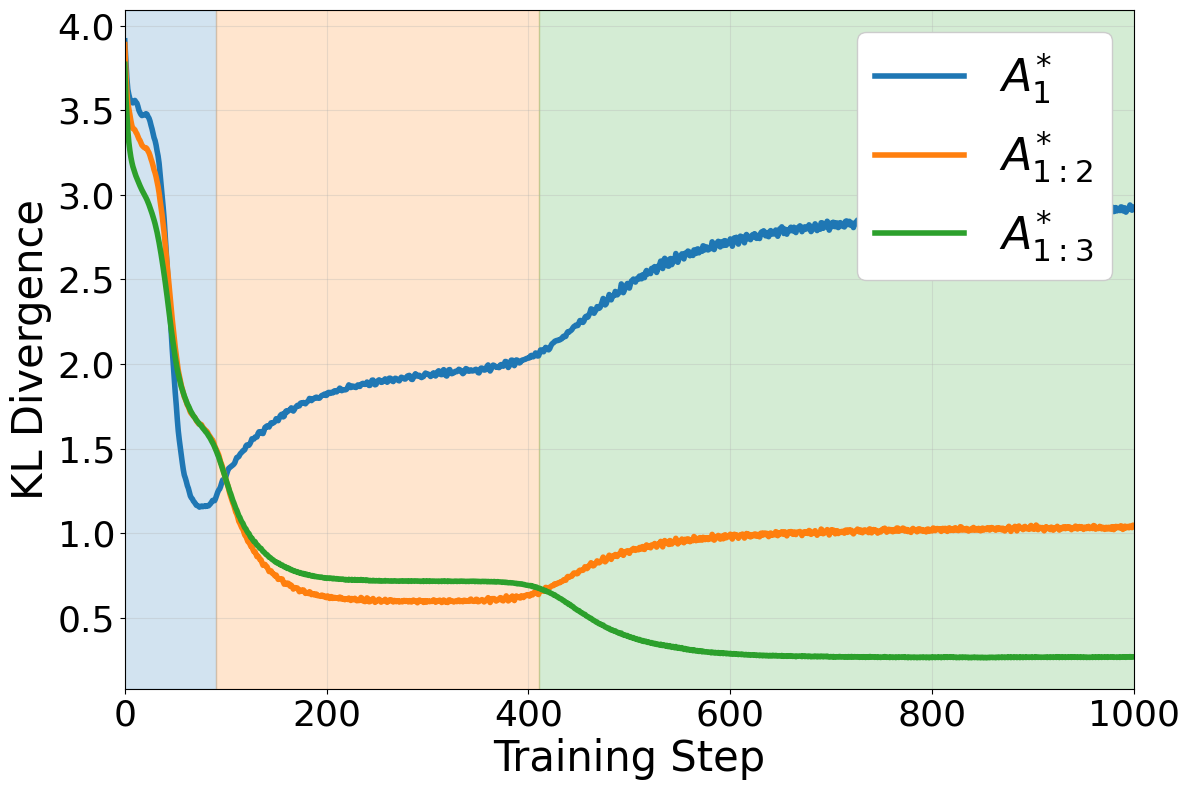

In [6]:
plot_kl_divergence_simple(
    run_id=run_id,
    divergence_steps=divergence_steps,
    max_steps=max_steps,
    figsize=figsize,
    learnable=False,
    shift_steps=True,
    save_name="figures/reverse-constants/results/kl-reversed",
)

Saved figure to figures/reverse-constants/results/val-loss-reversed.pdf


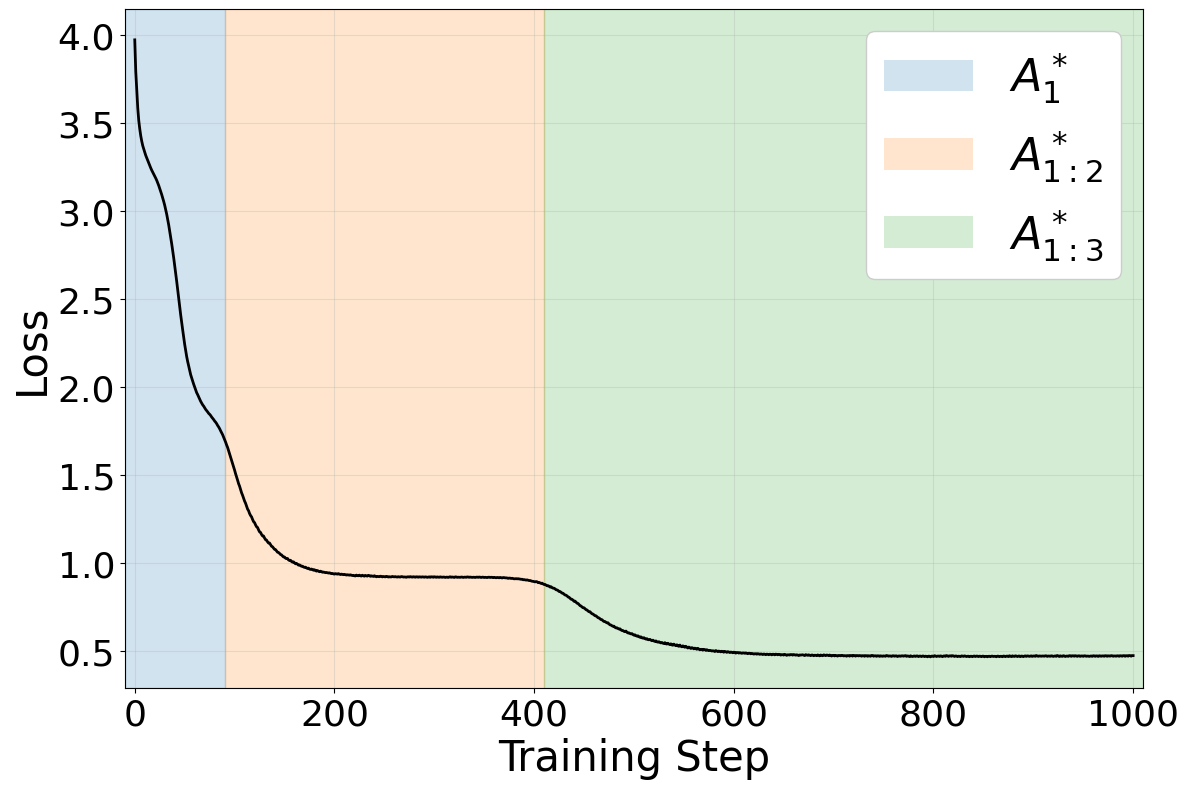

In [7]:
plot_val_loss_simple(
    run_id=run_id,
    divergence_steps=divergence_steps,
    max_steps=max_steps,
    figsize=figsize,
    shift_steps=True,
    save_name="figures/reverse-constants/results/val-loss-reversed",
)